In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


#2. 超参数设定（Hyperparameter Tuning）：代码中的超参数包括input_size（输入特征的大小）、num_classes（类别数量）、
#num_epochs（训练轮数）、batch_size（批次大小）和learning_rate（学习率）。
#这些超参数的选择对于模型的性能和训练过程至关重要，可以通过调整它们来优化模型的表现。

# Hyper-parameters 
input_size = 28 * 28    # 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

#1. 数据读取（Data Loading）：在这段代码中，使用了torchvision.datasets.MNIST来加载MNIST数据集，
#并通过torch.utils.data.DataLoader创建了训练集和测试集的数据加载器。这样可以方便地对数据进行批处理和随机打乱。

# MNIST dataset (images and labels)
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader (input pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)





#3. 这段代码中使用了nn.Linear定义了一个简单的线性回归模型，
#输入大小为input_size，输出大小为num_classes。这是一个简单的全连接层模型，但在实际应用中，可以根据任务需求设计更加复杂的深度学习模型。

# Logistic regression model
model1 = nn.Linear(input_size, num_classes)

#4. 模型训练（Model Training）：通过迭代训练数据集中的批次，将输入数据传递给模型进行前向传播，计算损失并进行反向传播更新模型参数。
#优化器（torch.optim.SGD）根据计算得到的梯度来更新模型参数，以最小化损失函数（nn.CrossEntropyLoss）。

# Loss and optimizer
# nn.CrossEntropyLoss() computes softmax internally
criterion = nn.CrossEntropyLoss()  

optimizer = torch.optim.SGD(model1.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, input_size)
        
        # Forward pass
        outputs = model1(images)
        loss = criterion(outputs, labels)
        
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
#模型测试（Model Testing）：在测试阶段，模型对测试集中的样本进行预测，并计算准确率来评估模型在测试集上的性能。
#通过torch.no_grad()上下文管理器，可以关闭梯度计算，以节省内存资源。
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size)
        outputs = model1(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

    print('Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model1.state_dict(), 'model1.ckpt')

D:\ProgramData\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


Epoch [1/5], Step [100/600], Loss: 2.2685
Epoch [1/5], Step [200/600], Loss: 2.1483
Epoch [1/5], Step [300/600], Loss: 2.0634
Epoch [1/5], Step [400/600], Loss: 1.9444
Epoch [1/5], Step [500/600], Loss: 1.8556
Epoch [1/5], Step [600/600], Loss: 1.8051
Epoch [2/5], Step [100/600], Loss: 1.7775
Epoch [2/5], Step [200/600], Loss: 1.6566
Epoch [2/5], Step [300/600], Loss: 1.6262
Epoch [2/5], Step [400/600], Loss: 1.5456
Epoch [2/5], Step [500/600], Loss: 1.4572
Epoch [2/5], Step [600/600], Loss: 1.5127
Epoch [3/5], Step [100/600], Loss: 1.4072
Epoch [3/5], Step [200/600], Loss: 1.4357
Epoch [3/5], Step [300/600], Loss: 1.4400
Epoch [3/5], Step [400/600], Loss: 1.3017
Epoch [3/5], Step [500/600], Loss: 1.2988
Epoch [3/5], Step [600/600], Loss: 1.2465
Epoch [4/5], Step [100/600], Loss: 1.2619
Epoch [4/5], Step [200/600], Loss: 1.1418
Epoch [4/5], Step [300/600], Loss: 1.1938
Epoch [4/5], Step [400/600], Loss: 1.1544
Epoch [4/5], Step [500/600], Loss: 1.0849
Epoch [4/5], Step [600/600], Loss:

## 结合框架上认知代码，可以改进的方面：

![img](images/teach.png)

- **1. 数据读取和预处理：这里我们先看预处理部分**
- **2. 网络改进为多层网络并设置激活函数**
- **3. 从原先MSE 变为torch.nn.functional.nll_loss()【手动softmax】,再改变为nn.CrossEntropyLoss()【自带softmax】**
- **4. 使用Adam优化器**
- **5. 使用GPU加速**
- **6. 改进评价指标 ACU,ROC等**
- **7. 保存模型**

### 1. 数据读取和预处理 定义图像的转换方式 transforms.Normalize(mean, std)

$$
\Large
\begin{aligned}
\text{input} x \implies \frac{x - \text{mean}}{\text{std}}
\end{aligned}
$$

In [2]:

# 定义图像的转换方式
image_transform = torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),  # 将图像转换为张量
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))  # 对图像进行标准化处理
                             ])
# 图像数据集
train_dataset = torchvision.datasets.MNIST('dataset/', 
                                           train=True, 
                                           download=True,
                                           transform=image_transform)  # 使用MNIST数据集进行训练，如果数据集不存在，则自动下载
test_dataset = torchvision.datasets.MNIST('dataset/', 
                                          train=False, 
                                          download=True,
                                          transform=image_transform)  # 使用MNIST数据集进行测试，如果数据集不存在，则自动下载

batch_size_train = 64  # 这里我们使用较小的批处理大小进行训练
batch_size_test = 1024

# 数据加载器
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=batch_size_train, 
                                           shuffle=True)  # 创建训练数据的数据加载器，将数据集划分为批次并打乱顺序
test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=batch_size_test, 
                                          shuffle=True)  # 创建测试数据的数据加载器，将数据集划分为批次并打乱顺序

In [3]:
for minibatch, (datas, labels) in enumerate(train_loader):
 b_x = datas.shape
 b_y = labels.shape
# 'minibatch: ', minibatch, '| train_data的维度(batchsize,channel,height,width)' ,b_x,'| train_target的维度(batchsize)',b_y    
 print ('minibatch: ', minibatch, '| train_data的维度' ,b_x,'| train_target的维度',b_y)

minibatch:  0 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  1 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  2 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  3 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  4 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  5 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  6 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  7 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  8 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  9 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  10 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_tar

minibatch:  91 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  92 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  93 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  94 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  95 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  96 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  97 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  98 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  99 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  100 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  101 | train_data的维度 torch.Size([64, 1, 28, 28])

minibatch:  180 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  181 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  182 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  183 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  184 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  185 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  186 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  187 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  188 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  189 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  190 | train_data的维度 torch.Size([64, 1,

minibatch:  273 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  274 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  275 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  276 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  277 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  278 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  279 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  280 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  281 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  282 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  283 | train_data的维度 torch.Size([64, 1,

minibatch:  362 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  363 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  364 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  365 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  366 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  367 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  368 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  369 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  370 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  371 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  372 | train_data的维度 torch.Size([64, 1,

minibatch:  449 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  450 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  451 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  452 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  453 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  454 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  455 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  456 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  457 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  458 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  459 | train_data的维度 torch.Size([64, 1,

minibatch:  536 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  537 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  538 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  539 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  540 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  541 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  542 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  543 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  544 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  545 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  546 | train_data的维度 torch.Size([64, 1,

minibatch:  629 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  630 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  631 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  632 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  633 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  634 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  635 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  636 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  637 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  638 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  639 | train_data的维度 torch.Size([64, 1,

minibatch:  725 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  726 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  727 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  728 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  729 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  730 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  731 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  732 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  733 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  734 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  735 | train_data的维度 torch.Size([64, 1,

minibatch:  813 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  814 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  815 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  816 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  817 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  818 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  819 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  820 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  821 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  822 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  823 | train_data的维度 torch.Size([64, 1,

minibatch:  901 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  902 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  903 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  904 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  905 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  906 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  907 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  908 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  909 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  910 | train_data的维度 torch.Size([64, 1, 28, 28]) | train_target的维度 torch.Size([64])
minibatch:  911 | train_data的维度 torch.Size([64, 1,

### 2. 网络改进为多层网络并设置激活函数

In [4]:
### 网络改进为多层网络并设置激活函数
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [5]:
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

### 4. 5. gpu加速 Adam优化器

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [7]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [8]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

In [9]:
# Train the model

train_loss = []
train_accu = []

total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        train_loss.append(loss.item())
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        
        prediction = outputs.data.max(1)[1]   # first column has actual prob.
        accuracy = prediction.eq(labels.data).sum()/train_loader.batch_size*100
        train_accu.append(accuracy)
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/938], Loss: 0.2095
Epoch [1/5], Step [200/938], Loss: 0.1659
Epoch [1/5], Step [300/938], Loss: 0.1744
Epoch [1/5], Step [400/938], Loss: 0.2024
Epoch [1/5], Step [500/938], Loss: 0.1258
Epoch [1/5], Step [600/938], Loss: 0.0803
Epoch [1/5], Step [700/938], Loss: 0.2604
Epoch [1/5], Step [800/938], Loss: 0.0862
Epoch [1/5], Step [900/938], Loss: 0.1675
Epoch [2/5], Step [100/938], Loss: 0.2158
Epoch [2/5], Step [200/938], Loss: 0.1010
Epoch [2/5], Step [300/938], Loss: 0.0188
Epoch [2/5], Step [400/938], Loss: 0.0525
Epoch [2/5], Step [500/938], Loss: 0.1071
Epoch [2/5], Step [600/938], Loss: 0.2938
Epoch [2/5], Step [700/938], Loss: 0.1057
Epoch [2/5], Step [800/938], Loss: 0.0238
Epoch [2/5], Step [900/938], Loss: 0.0917
Epoch [3/5], Step [100/938], Loss: 0.0544
Epoch [3/5], Step [200/938], Loss: 0.1431
Epoch [3/5], Step [300/938], Loss: 0.0264
Epoch [3/5], Step [400/938], Loss: 0.0571
Epoch [3/5], Step [500/938], Loss: 0.0107
Epoch [3/5], Step [600/938], Loss:

In [10]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Accuracy of the network on the 10000 test images: 97.72 %


## 其他改进点

   - **可视化损失和准确率（Visualizing Loss and Accuracy）**：这段代码没有提供可视化损失和准确率的部分。为了更好地理解模型的训练过程和性能，可以使用一些可视化工具或库（如Matplotlib、TensorBoard等）来绘制损失和准确率曲线。

   - **数据增强（Data Augmentation），异步加载**：可以使用`torchvision.transforms`模块中的各种数据增强技术来提升模型的泛化能力，例如随机旋转、平移、缩放、裁剪等。通过在训练数据上应用这些变换，可以增加数据的多样性，减少过拟合的风险。

   - **更复杂的模型**：尝试使用更深层次的神经网络模型，例如卷积神经网络（Convolutional Neural Network，CNN）或循环神经网络（Recurrent Neural Network，RNN），以提高模型的性能。

   - **学习率调度（Learning Rate Scheduling）**：尝试使用学习率调度器（如`torch.optim.lr_scheduler`模块中的`StepLR`、`ReduceLROnPlateau`等）来动态调整学习率，以提高训练稳定性和性能。

   - **正则化（Regularization）**：通过添加正则化项（如L1正则化、L2正则化）来限制模型的复杂度，防止过拟合。

   - **更多评估指标**：除了准确率，可以计算模型的其他评估指标，如精确度、召回率、F1分数等。同时，可以绘制ROC曲线来衡量分类模型的性能。

   - **模型集成（Model Ensembling）**：尝试使用多个模型的预测结果进行集成，例如投票集成、平均集成等，以提高模型的鲁棒性和泛化能力。

   - **多卡加速（GPU Acceleration）**：如果有可用的GPU资源，可以将模型和数据移至GPU上进行加速计算，通过`model.to('cuda')`将模型移至GPU，`images.to('cuda')`将输入数据移至GPU。


### Loss或模型可视化

In [11]:
import matplotlib.pyplot as plt

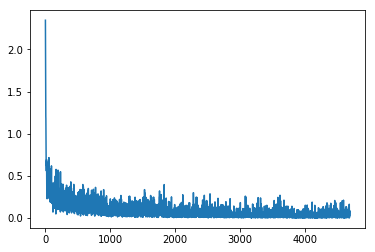

In [12]:
import numpy as np
plt.plot(np.arange(len(train_loss)), train_loss)

In [13]:
type(train_accu[0])

torch.Tensor

In [14]:
train_accu_np = [tensor.item() for tensor in train_accu]


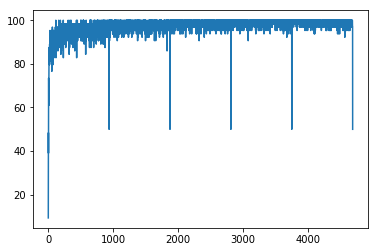

In [15]:
plt.plot(np.arange(len(train_accu_np)), train_accu_np)

In [16]:
from torchsummary import summary

# 创建模型对象
model = NeuralNet(input_size, hidden_size, num_classes)

# 将模型移动到相同的设备上
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# 将输入数据移动到相同的设备上
input_data = torch.randn(batch_size, input_size).to(device)

# 将模型的权重类型转换为 torch.cuda.FloatTensor
model = model.float()

# 执行模型摘要
summary(model, (input_size,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 500]         392,500
              ReLU-2                  [-1, 500]               0
            Linear-3                   [-1, 10]           5,010
Total params: 397,510
Trainable params: 397,510
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 1.52
Estimated Total Size (MB): 1.53
----------------------------------------------------------------


**其他可视化工具**
- TensorBoard： https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html
- Wandb： https://docs.wandb.ai/guides/integrations/pytorch

### 自定义数据集 
 - 官网 https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
 - 异步加载 https://zhuanlan.zhihu.com/p/639275063

### 正则化 和 学习率调度
正则化：通过添加正则化项（如L2正则化）到损失函数中，可以惩罚模型的权重，防止过拟合。正则化可以帮助减少模型的复杂度，提高模型的泛化能力，并减少对训练数据的过度拟合。通过控制正则化项的强度，您可以平衡模型的拟合能力和泛化能力。

学习率调度：学习率调度可以在训练过程中动态地调整学习率，以改善模型的收敛性和性能。通过逐渐减小学习率，可以使模型更加稳定地靠近最优解。常见的学习率调度方法包括步进调度（StepLR）、指数调度（ExponentialLR）、余弦退火调度（CosineAnnealingLR）等。调整学习率可以帮助模型更好地适应数据分布，并提高模型的泛化能力。

综合来说，通过添加正则化和学习率调度，您可以改善模型的训练效果，减少过拟合的风险，提高模型的泛化能力，并使训练过程更加稳定和可控。请注意，正则化和学习率调度的具体效果取决于数据集和模型的特性，需要根据具体情况进行调整和优化。

In [20]:
import torch.optim.lr_scheduler as lr_scheduler

In [21]:
model2 = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [22]:
scheduler = lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

In [35]:
optimizer = torch.optim.Adam(model2.parameters(), lr=0.0001, weight_decay=0.0001)  

In [36]:
# Train the model

train_loss = []
train_accu = []

total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model2(images)
        loss = criterion(outputs, labels)
        train_loss.append(loss.item())
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        
        
        # Update learning rate
        scheduler.step()
        
        prediction = outputs.data.max(1)[1]   # first column has actual prob.
        accuracy = prediction.eq(labels.data).sum()/train_loader.batch_size*100
        train_accu.append(accuracy)
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/938], Loss: 0.0385
Epoch [1/5], Step [200/938], Loss: 0.0164
Epoch [1/5], Step [300/938], Loss: 0.0342
Epoch [1/5], Step [400/938], Loss: 0.0448
Epoch [1/5], Step [500/938], Loss: 0.0150
Epoch [1/5], Step [600/938], Loss: 0.0181
Epoch [1/5], Step [700/938], Loss: 0.0216
Epoch [1/5], Step [800/938], Loss: 0.0182
Epoch [1/5], Step [900/938], Loss: 0.0564
Epoch [2/5], Step [100/938], Loss: 0.0136
Epoch [2/5], Step [200/938], Loss: 0.0754
Epoch [2/5], Step [300/938], Loss: 0.0262
Epoch [2/5], Step [400/938], Loss: 0.0987
Epoch [2/5], Step [500/938], Loss: 0.0093
Epoch [2/5], Step [600/938], Loss: 0.0088
Epoch [2/5], Step [700/938], Loss: 0.0092
Epoch [2/5], Step [800/938], Loss: 0.0079
Epoch [2/5], Step [900/938], Loss: 0.0065
Epoch [3/5], Step [100/938], Loss: 0.0347
Epoch [3/5], Step [200/938], Loss: 0.0593
Epoch [3/5], Step [300/938], Loss: 0.0149
Epoch [3/5], Step [400/938], Loss: 0.0275
Epoch [3/5], Step [500/938], Loss: 0.0144
Epoch [3/5], Step [600/938], Loss:

In [37]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)

with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model2.state_dict(), 'model.ckpt')

Accuracy of the network on the 10000 test images: 98.35 %


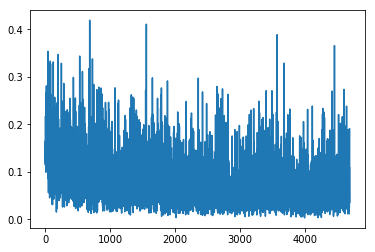

In [33]:
plt.plot(np.arange(len(train_loss)), train_loss)

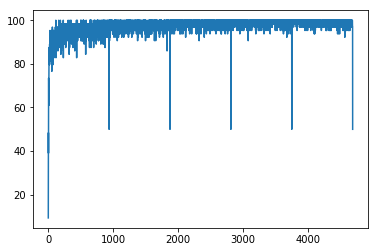

In [34]:
plt.plot(np.arange(len(train_accu_np)), train_accu_np)

选择最佳的学习率调度参数，通常需要进行一些试验和评估。以下是一些常用的方法来帮助您选择最佳的学习率调度参数：

网格搜索：您可以定义一组候选的step_size和gamma值，然后使用网格搜索方法在这些参数组合上进行训练和评估。通过比较模型在不同参数组合下的性能，您可以选择具有最佳性能的参数组合。

随机搜索：与网格搜索类似，但是您可以随机选择参数组合进行训练和评估。这种方法可以更高效地探索参数空间，并且在某些情况下可能会找到更好的参数组合。

交叉验证：使用交叉验证的方法来评估不同参数组合下的模型性能。将数据集分为训练集和验证集，在训练过程中使用不同的参数组合进行训练，并在验证集上评估模型的性能。通过比较不同参数组合下的验证集性能，选择具有最佳性能的参数组合。

学习率范围测试（Learning Rate Range Test）：这是一种快速确定学习率范围的方法。从一个非常小的学习率开始，逐渐增加学习率，并观察模型的损失函数随学习率变化的情况。通常，损失函数在较低的学习率下会下降得很慢，在合适的学习率范围内下降得很快，然后在学习率过高时会出现震荡或上升的情况。通过观察损失函数的变化，您可以选择合适的学习率范围，并根据该范围选择适当的调度参数。

无论使用哪种方法，重要的是要在评估参数组合时考虑模型的整体性能，包括训练集和验证集的损失和准确率。此外，还要注意不要过度调整参数，以免过拟合训练集或导致性能下降。

### 设计模型

课后自测：后面可以可以尝试设计CNN网络，并调整卷积核及其他网络参数
![img](images/cnn.png)